In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

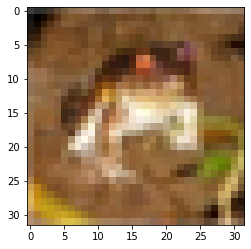

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train = y_train.reshape(-1,)  #reshaping the 2D to 1d

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

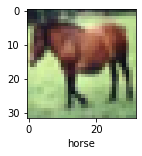

In [ ]:
plot_sample(X_train,y_train,7)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
#strides=(2,2)
#padding="same"
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4838 - accuracy: 0.4669
Epoch 2/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1297 - accuracy: 0.6065
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9984 - accuracy: 0.6503
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9164 - accuracy: 0.6814
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8572 - accuracy: 0.7023
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7997 - accuracy: 0.7230
Epoch 7/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.7563 - accuracy: 0.7366
Epoch 8/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7143 - accuracy: 0.7513
Epoch 9/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.6715 - accuracy: 0.7665
Epoch 10/10
1563/1563 [==============================] - 92s 59m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9772 - accuracy: 0.6845


[0.9771595597267151, 0.684499979019165]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 7s 21ms/step


array([[1.26166735e-02, 1.43906538e-04, 3.66557180e-03, 6.82934821e-01,
        2.81584889e-05, 2.61019409e-01, 1.63009074e-02, 2.10273574e-05,
        2.27279793e-02, 5.41682879e-04],
       [1.81647320e-03, 9.62828696e-02, 4.15903514e-06, 1.17838863e-06,
        2.36071251e-08, 5.56501583e-08, 6.39976179e-08, 4.07247747e-08,
        9.00937140e-01, 9.57907701e-04],
       [2.11365268e-01, 1.50181040e-01, 5.53120160e-03, 4.87184804e-03,
        9.72716790e-03, 2.99034436e-04, 8.46540148e-04, 6.57408847e-04,
        4.95779663e-01, 1.20740846e-01],
       [8.74802172e-01, 1.01952441e-03, 1.83621782e-03, 3.40333136e-05,
        9.12121206e-04, 1.39215629e-07, 1.47635444e-06, 1.12919415e-05,
        1.21047162e-01, 3.35917925e-04],
       [6.43593057e-06, 6.10008952e-04, 6.03476493e-03, 9.95926559e-02,
        1.80943802e-01, 6.26979349e-03, 7.05445051e-01, 2.28973549e-05,
        1.05636613e-03, 1.81771029e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

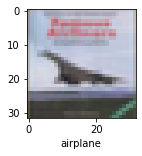

In [ ]:
plot_sample(X_test, y_test,3)